<a href="https://colab.research.google.com/github/samikshyasanskruti/DeepLearning-with-TesorFlow/blob/main/ASSIGNMENT_2(DLWTF_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NEURAL-NETWORKS FOR REGRESSION & CLASSIFICATION**

**SAMIKSHYA SANSKRUTI SWAIN**

**REG NO.-2341019634**

# 1. Write a Python code to build a TensorFlow-Keras model (Sequential API) to implement a single-layered perceptron (one Dense unit) that predicts house price from area.

**(a)Import the given packages:numpy,pandas,matplotlib,and from Keras import via tensorflow and tensorflow.keras.**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

**(b)Generate a synthetic data set for 2000 samples for area values from a Normal distribution with mean=0 and std=1,scale the std to 2.5,and shift the mean by 25.**

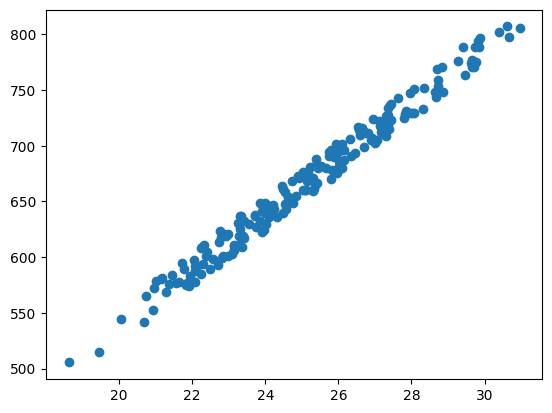

In [ ]:
# Generate a random data
np.random.seed(0)
area=2.5*np.random.randn(200)+25
price=25*area+5+np.random.randint(20,50,size=len(area))
data=np.array([area,price])
data=pd.DataFrame(data.T,columns=['area','price'])
plt.scatter(data['area'],data['price'])
plt.show()

**(c)Normalize both features(area) and target(price) using Min-Max normalization.**

In [ ]:
#Normalization using min max
data=(data-data.min())/(data.max()-data.min())

**(d)Build and train the model using Sequential with a single Dense layer(units=1).For training,the loss is set to mean squared error,the optimizer is SGD,the batch size is 32,the validation split is 0.2 and the model is run for 100 epochs.**

In [ ]:
# Model building
model=K.Sequential([Dense(1,input_shape=[1,], activation=None)])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**(e)Report the training and validation MSE for all 100 epochs.Predict the price for a given area(e.g;28.0) and plot Actual vs Predicted prices.**

In [ ]:
model.compile(optimizer='sgd',loss='mse')
history = model.fit(x=data['area'],y=data['price'],epochs=100,batch_size=32,verbose=1,validation_split=0.2)

# Predict output
y_pred = model.predict(data['area'])


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.4218 - val_loss: 0.3238
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3335 - val_loss: 0.2543
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2800 - val_loss: 0.2013
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2125 - val_loss: 0.1609
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1714 - val_loss: 0.1300
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1509 - val_loss: 0.1065
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1048 - val_loss: 0.0886
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0824 - val_loss: 0.0749
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0806 - val_loss: 0.0646
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0723 - val_loss: 0.0568
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0594 - val_loss: 0.0509
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0574 - val_lo

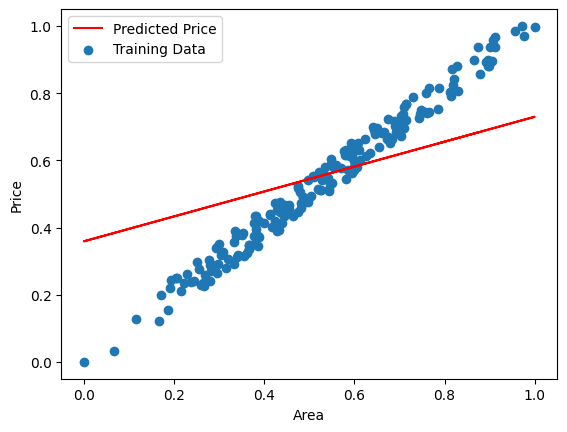

In [ ]:
# plot the actual and predicted value
plt.plot(data['area'],y_pred,color='red',label='Predicted Price')
plt.scatter(data['area'],data['price'],label='Training Data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Write a Python code to build a regression model in TensoFlow-Keras to predict MPG(fuel efficiency) from the UCI Auto MPG dataset using:Keras Normalization layer for input standardization(mean=0,std=1),a feed-forward network with two hidden layers(ReLU), and Adam optimizer and MSE loss.

**(a)Import the given packages:numpy,pandas,matplotlib,seaborn and Keras modules(Dense,Normalization).**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense,Normalization


**(b)Load the Auto MPG dataset from the UCI repository:URL:https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data.
-Column names as['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin'
-Treat '?' as NaN;deop rows with NaNs.
-Drp the origin column;keep 7 input features.**

In [ ]:
#gradient the datas from the UCI ML repo
!wget https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
import zipfile

with zipfile.ZipFile('auto+mpg.zip','r') as zip_ref:
  zip_ref.extractall('auto_mpg')

import pandas as pd
column_names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
data=pd.read_csv('auto_mpg/auto-mpg.data',names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)
data.head()
#drop column
data=data.drop('origin',axis=1)
print(data.isna().sum())
data=data.dropna()
#print(data.isna().sum())

--2025-10-28 15:01:57--  https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto+mpg.zip.4’

auto+mpg.zip.4          [ <=>                ]  14.52K  --.-KB/s    in 0.04s   

2025-10-28 15:01:58 (383 KB/s) - ‘auto+mpg.zip.4’ saved [14873]

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64


**(c)Split the data into 80.**

In [ ]:
#split the dayaset
train_dataset=data.sample(frac=0.8,random_state=0)
test_dataset=data.drop(train_dataset.index)

**(d)Visualize relationships with Seaborn pairplot(features+mpg)**

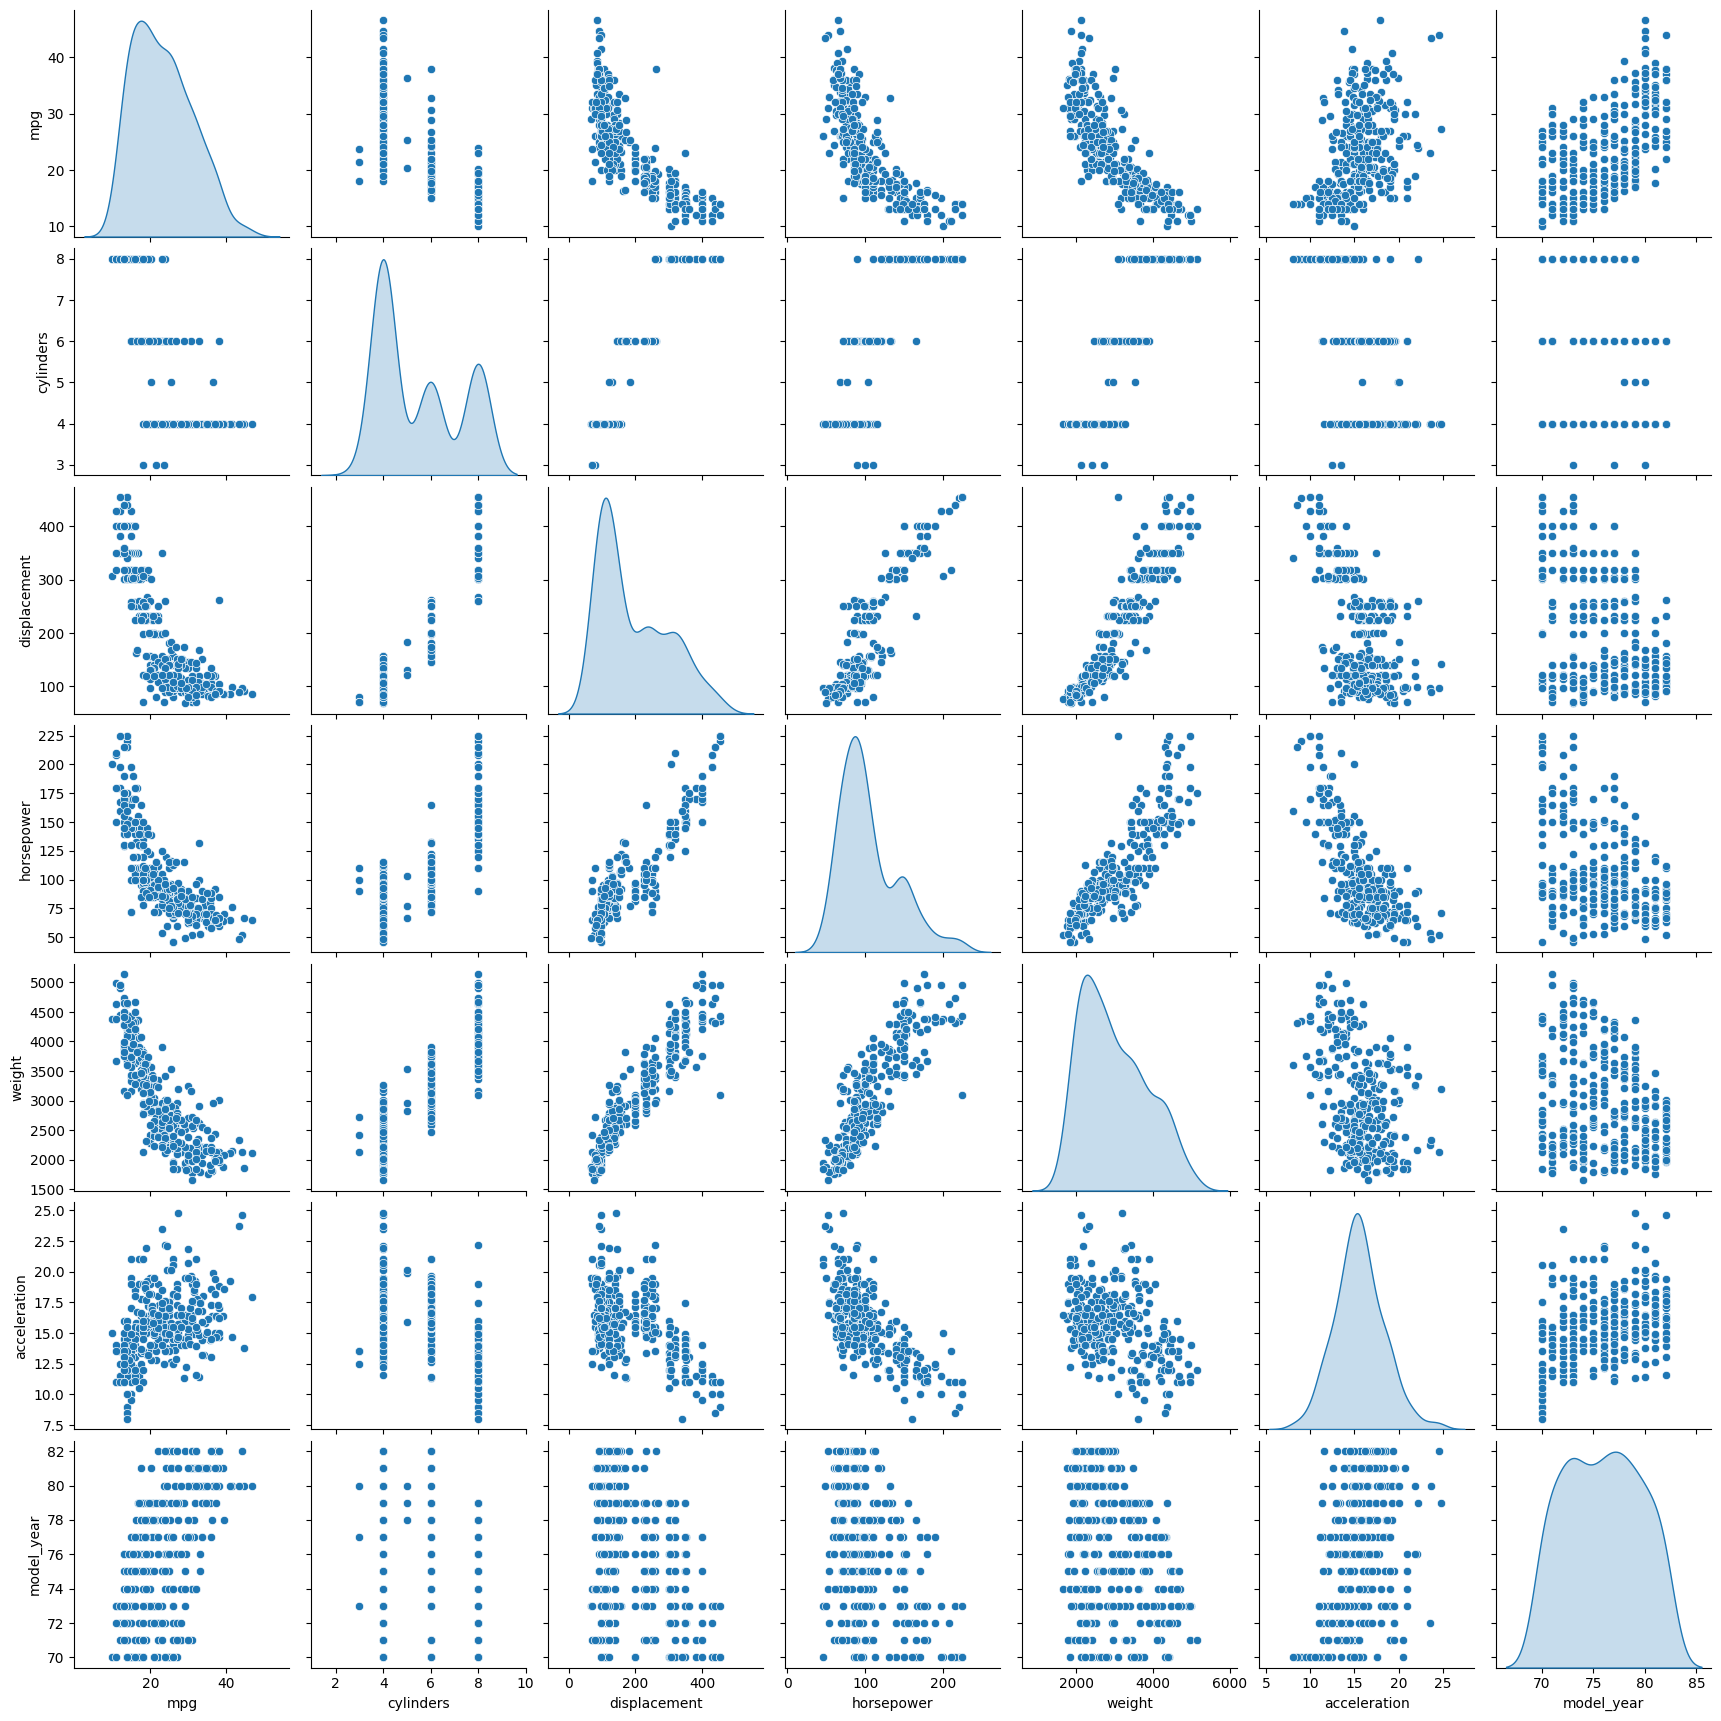

In [ ]:
#pair plot
sns.pairplot(train_dataset[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']],diag_kind='kde')


**(e)Separate inputs(features) and label(mpg).**

In [ ]:
#separate the features
train_features=train_dataset.copy()
test_features=test_dataset.copy()
train_labels=train_features.pop('mpg')
test_labels=test_features.pop('mpg')

**(f)Normalize inputs using Keras with Normalization(fit only on training features)**

In [ ]:
#normalize
data_normalizer=Normalization(axis=-1)
data_normalizer.adapt(np.array(train_features))

**(g)Build a Keras model with Normalisation with an input layer dense layer and an output layer.**

In [ ]:
#model building
model=K.Sequential([
    data_normalizer,
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1)
])
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (314, 6)               │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

**(h)Compile and train the model by stting the following parameters.
(optimizer='adam',loss='MSE',epochs=100,validation=0.2)**

In [ ]:
# model training
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(train_features,train_labels,epochs=100,batch_size=32,verbose=1,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 601.3381 - val_loss: 611.5449
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 560.4750 - val_loss: 581.0881
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 556.2406 - val_loss: 547.5186
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 540.8997 - val_loss: 508.5275
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 483.7721 - val_loss: 462.6254
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 441.4896 - val_loss: 406.7895
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 406.3058 - val_loss: 340.9040
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 320.2704 - val_loss: 269.0035
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 257.2367 - val_loss: 194.9327
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 187.2482 - val_loss: 129.6084
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 122.1641 - val_loss: 82.5800
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0

**(i)Plot the training vs validation loss curves.**

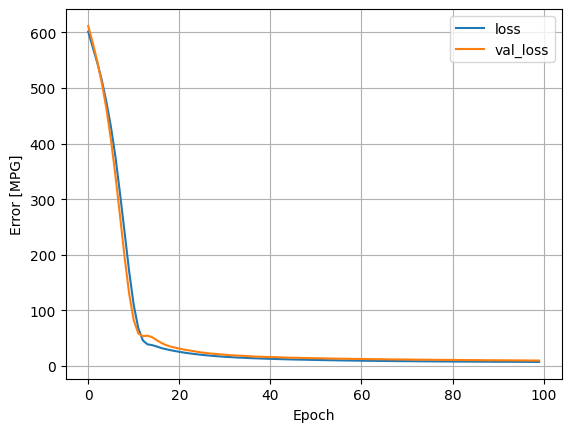

In [ ]:
#plot
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

**(j)Evaluate on test set and Predict mpg for test features,also Plot True vs Predicted(diagonal reference line)**

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


(0.0, 50.0)

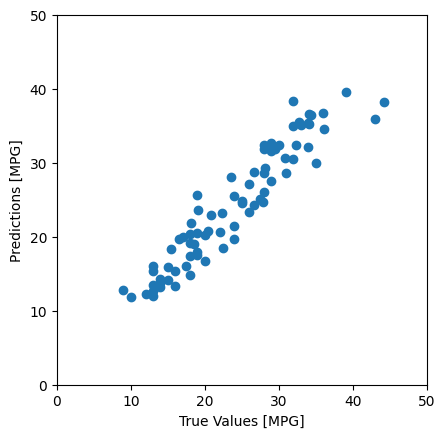

In [ ]:
#predict
y_pred=model.predict(test_features).flatten()
a=plt.axes(aspect='equal')
plt.scatter(test_labels,y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims=[0,50]
plt.xlim(lims)
plt.ylim(lims)

#3. Write a Python code to build a logistic regression classifier for MNIST digitsusing TensorFlow-Keras.

**(a) Import the given packages:numpy,pandas,matplotlib and from Keras import via tensorflow and tensorflow.keras as K from Keras,Dense,Flatten.**

In [ ]:
from tensorflow.keras.layers import Dense,Flatten
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K

**(b) Load the MNIST dataset as tf.keras.datasets.mnist.load.data()**

In [ ]:
((train_data,train_labels),(test_data,test_labels))=tf.keras.datasets.mnist.load_data()

**(c) Preprocess the datawhere scale pixels by 225 for floats in[0,1],[0,1],[0,1] and labels as int32.--->Normalize the image such that will be between 0-1(dividing by 255)**

In [ ]:
train_data=train_data/np.float32(255)
train_labels=train_labels.astype(np.int32)
test_data=test_data/np.float32(255)
test_labels=test_labels.astype(np.int32)


**(d)Build model the sequential model as Sequential(Flatten(input_shape=(28,28)),Dense(10,activation='softmax'))**

In [ ]:
model=K.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10,activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

**(e)Compile the model by providing the optimizer as 'adam',loss='sparse_categorical_crossentropy',metrices=['accuracy'].**

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

**(f)Train the model for 50 epochs and set validation split to 0.2**

In [ ]:
history=model.fit(train_data,y=train_labels,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7940 - loss: 0.7859 - val_accuracy: 0.9127 - val_loss: 0.3225
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9111 - loss: 0.3233 - val_accuracy: 0.9194 - val_loss: 0.2863
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9181 - loss: 0.2927 - val_accuracy: 0.9231 - val_loss: 0.2769
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9233 - loss: 0.2780 - val_accuracy: 0.9262 - val_loss: 0.2682
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9263 - loss: 0.2661 - val_accuracy: 0.9253 - val_loss: 0.2680
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9261 - loss: 0.2649 - val_accuracy: 0.9268 - val_loss: 0.2673
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9273 - loss: 0.2619 - val_accuracy: 0.9277 - val_loss: 0.2634
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9279 - loss: 0.2589 - val_accurac

**(g)Plot the loss curves.**

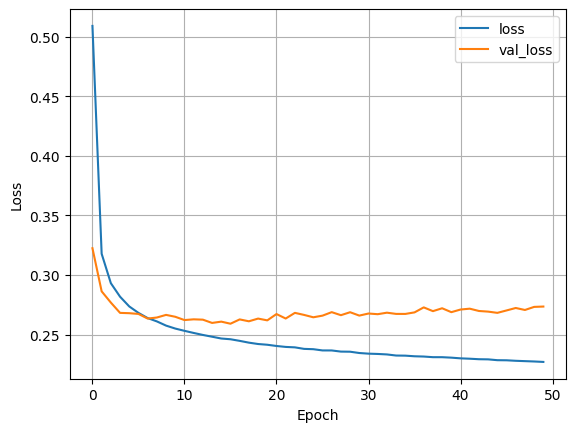

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

**(h) Predict on test set;for an index i,show(i)the image with predicted vs true label and confidence ,and (ii)a bar chart of predicted probabilities.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


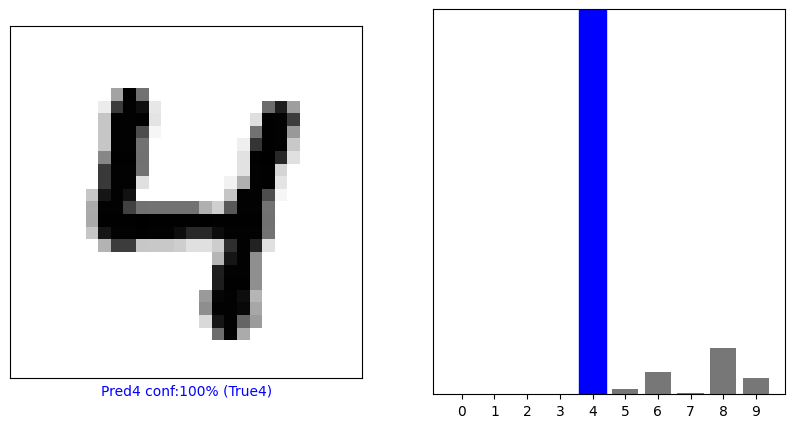

In [ ]:
def plot_image(i,predictions_array,true_label,img):
   true_label,img=true_label[i],img[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(img,cmap=plt.cm.binary)
   predicted_label=np.argmax(predictions_array)
   if predicted_label==true_label:
     color='blue'
   else:
     color='red'
   plt.xlabel("Pred{} conf:{:2.0f}% (True{})".format(predicted_label,100*np.max(predictions_array),true_label),color=color)
def plot_value_array(i,predictions_array,true_label):
  true_label=true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array,color='#777777')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


predictions=model.predict(test_data)
i=56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_data)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

